In [ ]:
import pandas as pd
import re
import nltk
nltk.download("all")
from gensim.models import Word2Vec
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

In [ ]:
df = pd.read_csv("straykids.csv", encoding = "ISO-8859-1")
df.head()
#df['lyrics'] = df['lyrics'].apply(lambda x: str(x).lower())
skz_lyrics = []
for lyrics in df['lyrics']:
    skz_lyrics.append(lyrics)
skz_lyrics = skz_lyrics[:-1]
len(skz_lyrics)


268

In [ ]:
new_lyrics = []
for lyric in skz_lyrics:
    #for line in lyric.split('\n'):
    for line in lyric.split(','):
        new_lyrics.append(line)

In [ ]:
def preprocess(text):
    text=text.lower()
    text=re.sub('[^0-9a-z]+',' ',text)
    words = text.split()
    words2 = [i for i in words if i not in stop]
    words3=' '.join(words2)
    return(words3)

In [ ]:
processed_lyrics = []
for lyric in new_lyrics:
    processed_lyrics.append(preprocess(lyric))

processed_lyrics[:10]

['call one shouting',
 'oh changbin',
 'choose path tough attitude like locomotive going recklessly track',
 'ayy fierce hurricane',
 'umbrellas flip inside faultfinder last day',
 'haha',
 'serves right go back woodcutter',
 'nothing cut way lower ego',
 'stick principles horns get louder grander honk',
 'honk']

In [ ]:
list_words=[]
for i in range(len(processed_lyrics)):
    list_words.append(processed_lyrics[i].split())
list_words[:5]

[['call', 'one', 'shouting'],
 ['oh', 'changbin'],
 ['choose',
  'path',
  'tough',
  'attitude',
  'like',
  'locomotive',
  'going',
  'recklessly',
  'track'],
 ['ayy', 'fierce', 'hurricane'],
 ['umbrellas', 'flip', 'inside', 'faultfinder', 'last', 'day']]

In [ ]:
total = 0
uniques = set()
for sent in list_words:
    for w in sent:
        total += 1
        uniques.add(w)        

In [ ]:
model1 = Word2Vec(size=100,window=5,min_count=10, sg=0, alpha = 0.025)

In [ ]:
model1.build_vocab(list_words)

In [ ]:
model1.train(list_words, total_examples=model1.corpus_count, epochs=100)

(119778, 628500)

In [ ]:
model1.wv.most_similar("heart")

[('getting', 0.9803234338760376),
 ('leave', 0.9754800200462341),
 ('keep', 0.9668456315994263),
 ('smile', 0.9659160375595093),
 ('domino', 0.9597247838973999),
 ('us', 0.9538736343383789),
 ('crazy', 0.9475643634796143),
 ('hop', 0.9373534321784973),
 ('closer', 0.9346956014633179),
 ('words', 0.934639036655426)]

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator

In [ ]:
pip install nlp-rake

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 981 kB 8.2 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=5b838585fa0480f76ae3a4fbd32dd11dec5218d24738ed3c8b45e2e93a11b70d
  Stored in directory: /root/.cache/pip/wheels/13/c7/b0/79f66658626032e78fc1a83103690ef6797d551cb22e56e734
Successfully built langdetect


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import nlp_rake
from spacy.lang.en.stop_words import STOP_WORDS

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
def keyword_displayer():
  lyr = df['lyrics']
  #lyr = pd.concat([lyr[l] for l in range(len(lyr))],axis = 0).dropna()
  text = ''
  for k in lyr.index:
    text += lyr[k]

  extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
  res = extractor.apply(text)
  print(res[:10])
    
  wc = WordCloud(background_color='white',width=800,height=600)
  plt.figure(figsize=(15,7))
  plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

[('silent cry', 4.0), ('make plans', 4.0), ('fly high', 4.0), ("feelin' good", 4.0), ('bell rings', 4.0), ('stray kids', 4.0), ('spider web', 3.75), ('super board', 3.75), ('woah-oh higher', 3.282051282051282), ('higher', 1.6153846153846154)]


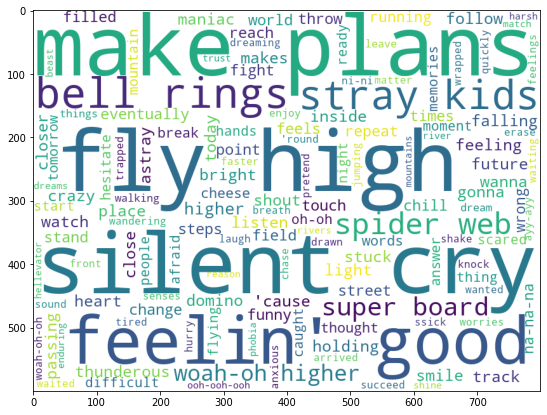

In [ ]:
keyword_displayer()

# **attempting some topic modeling?**

In [ ]:
pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=8046a0dd42cfa198377439ba859ee6998ecfe511f6cc18b048b584914204591e
  Stored in directory: /root/.cache/pip/wheels/90/61/ec/9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=fa776ca5a10b3aa3e4c9b9564dfcf823d212ef65001412272aa355d9d0519723
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built pyLDAvis sklearn


In [ ]:
pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pyLDAvis.gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement pyLDAvis.gensim (from versions: none)
ERROR: No matching distribution found for pyLDAvis.gensim


In [ ]:
import re
import numpy as np
import pandas as  pd
from pprint import pprint# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel# spaCy for preprocessing
import spacy# Plotting tools
import pyLDAvis
#import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline


/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable


In [ ]:
bigram = gensim.models.Phrases(list_words, min_count = 5, threshold = 100)
trigram = gensim.models.Phrases(bigram[list_words], threshold = 100)
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
print(trigram_mod[bigram_mod[list_words[0]]])

/usr/local/lib/python3.8/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['call', 'one', 'shouting']


In [ ]:
def make_bigrams(texts):
  return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
list_words_bigrams = make_bigrams(list_words)
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
data_lemmatized = lemmatization(list_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['call', 'shouting']]


In [ ]:
id2word = corpora.Dictionary(data_lemmatized)
texts = data_lemmatized
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:1])
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]
print(len(corpus))

[[(0, 1), (1, 1)]]
1335


In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [ ]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.108*"go" + 0.046*"even" + 0.039*"day" + 0.029*"away" + 0.026*"never" + '
  '0.024*"try" + 0.019*"stop" + 0.017*"pass" + 0.014*"let" + 0.013*"close"'),
 (1,
  '0.078*"get" + 0.042*"give" + 0.036*"people" + 0.031*"keep" + 0.021*"trap" + '
  '0.020*"hold" + 0.014*"word" + 0.013*"hard" + 0.013*"alone" + 0.010*"open"'),
 (2,
  '0.098*"back" + 0.043*"dream" + 0.037*"take" + 0.034*"feel" + 0.029*"see" + '
  '0.023*"fly" + 0.023*"high" + 0.018*"way" + 0.016*"call" + 0.015*"right"'),
 (3,
  '0.040*"run" + 0.038*"time" + 0.038*"look" + 0.029*"want" + 0.029*"still" + '
  '0.025*"tell" + 0.021*"place" + 0.019*"eye" + 0.018*"walk" + 0.017*"come"')]


In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
# a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for


Perplexity:  -8.03897559264463

Coherence Score:  0.5462016855518219


In [ ]:
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.168910 -0.009597       1        1  29.168568
3     -0.077068 -0.129607       2        1  28.474997
2     -0.062308  0.129868       3        1  21.567266
1     -0.029534  0.009336       4        1  20.789168, topic_info=        Term        Freq       Total Category  logprob  loglift
5         go  157.000000  157.000000  Default  30.0000  30.0000
18      back  106.000000  106.000000  Default  29.0000  29.0000
26       get   81.000000   81.000000  Default  28.0000  28.0000
85      even   67.000000   67.000000  Default  27.0000  27.0000
326      run   58.000000   58.000000  Default  26.0000  26.0000
...      ...         ...         ...      ...      ...      ...
313     dark    6.756564   35.264061   Topic4  -5.0379  -0.0816
543   escape    5.311742   23.731518   Topic4  -5.2785   0.0739
1244  tunnel    4.940298   23.043507   Topic4  -5.3510   0.0308
711    fight    5.102782   28.938125   Topic4  -5.3187  -0.1646
91      push    4.562274   17.861123   Topic4  -5.4306   0.2059

[193 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
416       1  0.180578  afraid
416       2  0.481541  afraid
416       3  0.120385  afraid
416       4  0.240770  afraid
371       1  0.061241   alone
...     ...       ...     ...
201       2  0.060265    word
201       4  0.843705    word
449       2  0.971959   world
352       1  0.920943   worry
505       3  0.385418   wrong

[261 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 3, 2])

# BTS Work

In [ ]:
bts_df = pd.read_csv("bts.csv", encoding = "ISO-8859-1")
bts_df.head()
bts_df['lyrics'] = bts_df['lyrics'].apply(lambda x: str(x).lower())
bts_lyrics = []
for lyrics in bts_df['lyrics']:
    bts_lyrics.append(lyrics)
bts_lyrics = bts_lyrics[:-1]
len(bts_lyrics)

299

In [ ]:
new_bts_lyrics = []
for lyric in bts_lyrics:
    for line in lyric.split('\n'):
        new_bts_lyrics.append(line)

In [ ]:
def preprocess_bts(text):
    text=text.lower()
    text=re.sub('[^0-9a-z]+',' ',text)
    words = text.split()
    words2 = [i for i in words if i not in stop]
    words3=' '.join(words2)
    return(words3)

In [ ]:
processed_bts_lyrics = []
for lyric in new_bts_lyrics:
    processed_bts_lyrics.append(preprocess_bts(lyric))

processed_bts_lyrics[:10]

['going progress steps',
 'bit difficult',
 'ready set begin',
 'big hit exclusive exclusive',
 'dj friz',
 '',
 'b n g n',
 'bulletproof boy scouts',
 '',
 '2 cool 2 cool 4 skool']

In [ ]:
list_bts_words=[]
for i in range(len(processed_bts_lyrics)):
    list_bts_words.append(processed_bts_lyrics[i].split())
list_bts_words[:5]

[['going', 'progress', 'steps'],
 ['bit', 'difficult'],
 ['ready', 'set', 'begin'],
 ['big', 'hit', 'exclusive', 'exclusive'],
 ['dj', 'friz']]

In [ ]:
total = 0
uniques = set()
for sent in list_bts_words:
    for w in sent:
        total += 1
        uniques.add(w)
        
print(total)

65211


In [ ]:
model2 = Word2Vec(size=100,window=5,min_count=10, sg=0, alpha = 0.025)

In [ ]:
model2.build_vocab(list_bts_words)

In [ ]:
model2.train(list_bts_words, total_examples=model2.corpus_count, epochs=100)

(4507225, 6521100)

In [ ]:
model2.wv.most_similar('heart')

/usr/local/lib/python3.8/dist-packages/gensim/matutils.py:737: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if np.issubdtype(vec.dtype, np.int):


[('remedy', 0.35424500703811646),
 ('gets', 0.31999605894088745),
 ('cry', 0.307437539100647),
 ('faster', 0.29343128204345703),
 ('beats', 0.28286880254745483),
 ('instead', 0.27967214584350586),
 ('breathe', 0.2784969210624695),
 ('dad', 0.27049076557159424),
 ('deeper', 0.2582330107688904),
 ('singing', 0.25821834802627563)]

In [ ]:
def bts_keyword_displayer():
  lyr = bts_df['lyrics']
  #lyr = pd.concat([lyr[l] for l in range(len(lyr))],axis = 0).dropna()
  text = ''
  for k in lyr.index:
    text += lyr[k]

  extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
  res = extractor.apply(text)
  print(res[:10])
    
  wc = WordCloud(background_color='white',width=800,height=600)
  plt.figure(figsize=(15,7))
  plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

[('bang bang', 4.0), ('epik high', 4.0), ('hip hop', 4.0), ('big cars', 4.0), ('big rings', 4.0), ('daily life', 4.0), ('alexander mcqueen', 4.0), ('hey ya', 4.0), ('good car', 4.0), ('real fact', 4.0)]


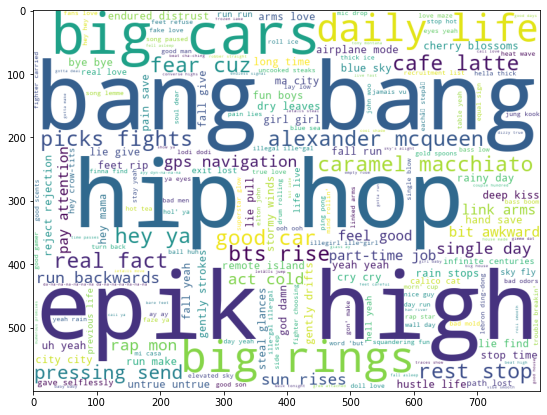

In [ ]:
bts_keyword_displayer()

In [ ]:
list_words_bigrams_bts = make_bigrams(list_bts_words)
nlp2 = spacy.load("en_core_web_sm", disable=["parser", "ner"])
data_lemmatized_bts = lemmatization(list_words_bigrams_bts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized_bts[:1])

[['go', 'progress', 'step']]


In [ ]:
id2word_bts = corpora.Dictionary(data_lemmatized_bts)
texts_bts = data_lemmatized_bts
corpus_bts = [id2word_bts.doc2bow(text) for text in texts_bts]
print(corpus_bts[:1])
[[(id2word_bts[id], freq) for id, freq in cp] for cp in corpus_bts[:1]]
print(len(corpus_bts))

[[(0, 1), (1, 1), (2, 1)]]
20940


In [ ]:
da_model_bts = gensim.models.ldamodel.LdaModel(corpus=corpus_bts,
                                           id2word=id2word_bts,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=25,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [ ]:
pprint(da_model_bts.print_topics())
doc_lda_bts = da_model_bts[corpus_bts]

[(0,
  '0.040*"want" + 0.039*"feel" + 0.037*"stay" + 0.033*"baby" + 0.032*"hand" + '
  '0.031*"heart" + 0.023*"way" + 0.022*"happy" + 0.017*"put" + 0.017*"die"'),
 (1,
  '0.084*"go" + 0.043*"make" + 0.030*"become" + 0.026*"na" + 0.026*"away" + '
  '0.023*"life" + 0.022*"well" + 0.020*"young" + 0.017*"true" + 0.016*"live"'),
 (2,
  '0.076*"know" + 0.064*"love" + 0.040*"problem" + 0.039*"let" + 0.031*"come" '
  '+ 0.027*"take" + 0.027*"give" + 0.026*"right" + 0.019*"new" + 0.017*"hear"'),
 (3,
  '0.061*"get" + 0.045*"even" + 0.033*"day" + 0.032*"world" + 0.028*"time" + '
  '0.028*"look" + 0.027*"dream" + 0.020*"cause" + 0.019*"say" + 0.019*"never"'),
 (4,
  '0.056*"shit" + 0.054*"run" + 0.033*"pray" + 0.029*"keep" + 0.028*"still" + '
  '0.026*"always" + 0.025*"see" + 0.015*"full" + 0.015*"anyway" + '
  '0.014*"moment"')]


In [ ]:
# Compute Perplexity
print('\nPerplexity: ', da_model_bts.log_perplexity(corpus_bts))  
# a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda_bts = CoherenceModel(model=da_model_bts, texts=data_lemmatized_bts, dictionary=id2word_bts, coherence='c_v')
coherence_lda_bts = coherence_model_lda_bts.get_coherence()
print('\nCoherence Score: ', coherence_lda_bts)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt


Perplexity:  -7.835318518751636

Coherence Score:  0.571021833963125


In [ ]:
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(da_model_bts, corpus_bts, id2word_bts)
vis

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.094785  0.240691       1        1  24.452714
0      0.281281  0.010677       2        1  22.332667
2     -0.096953 -0.163441       3        1  20.316426
1     -0.042542 -0.037673       4        1  16.736096
4     -0.047001 -0.050255       5        1  16.162096, topic_info=         Term        Freq       Total Category  logprob  loglift
0          go  724.000000  724.000000  Default  30.0000  30.0000
80       know  789.000000  789.000000  Default  29.0000  29.0000
54        get  765.000000  765.000000  Default  28.0000  28.0000
237      love  671.000000  671.000000  Default  27.0000  27.0000
265      shit  462.000000  462.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
777   feeling   70.928226   73.498641   Topic5  -4.7616   1.7869
674      wake   60.461999   68.594001   Topic5  -4.9213   1.6963
800       top   64.778398   91.318400   Topic5  -4.8523   1.4791
3331     tony   94.743236  470.832739   Topic5  -4.4721   0.2192
2911       na   68.493140  642.679991   Topic5  -4.7966  -0.4164

[202 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1074      4  0.967901      air
500       2  0.985827    alone
459       3  0.994328  already
299       5  0.994026   always
419       1  0.052444   answer
...     ...       ...      ...
276       1  0.998433    world
141       3  0.993415    worry
765       3  0.967251    wound
107       5  0.983104     year
187       4  0.996384    young

[210 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 3, 2, 5])

# Ed Sheeran

In [ ]:
df = pd.read_csv("EdSheeran.csv", encoding = "utf-8")
df.head()
#df['lyrics'] = df['lyrics'].apply(lambda x: str(x).lower())
edlyrics = []
for lyrics in df['Lyric']:
  if (type(lyrics) == str):
    edlyrics.append(lyrics)
edlyrics = edlyrics[:-1]
len(edlyrics)

293

In [ ]:
newedlyrics = []
for lyric in edlyrics:
    #for line in lyric.split('\n'):
    for line in lyric.split(','):
        newedlyrics.append(line)
edlyrics = newedlyrics

In [ ]:
def preprocessed(text):
  print(type(text))
  if(type(text) == str):
    print(type(text))
    text=text.lower()
    text=re.sub('[^0-9a-z]+',' ',text)
    words = text.split()
    words2 = [i for i in words if i not in stop]
    words3=' '.join(words2)
    return(words3)

In [ ]:
processededlyrics = []
for lyric in edlyrics:
    processededlyrics.append(preprocess(lyric))

processededlyrics[:10]

['club best place find lover bar go friends table shots drinking fast talk slow come start conversation trust give chance take hand stop put van man jukebox start dance singing like pre girl know want love love handmade somebody like come follow lead may crazy mind say boy let talk much grab waist put body come follow lead come come follow lead love shape push pull like magnet although heart falling love body last night room bed sheets smell like every day discovering something brand new love body ohiohiohiohi love body ohiohiohiohi love body ohiohiohiohi love body every day discovering something brand new love shape one week let story begin going first date thrifty go eat fill bag fill plate talk hours hours sweet sour family okay leave get taxi kiss backseat tell driver make radio play singing like pre girl know want love love handmade somebody like come follow lead may crazy mind say boy let talk much grab waist put body come follow lead come come follow lead love shape push pull li

In [ ]:
listedwords=[]
for i in range(len(processededlyrics)):
    listedwords.append(processededlyrics[i].split())
listedwords[:5]

[['club',
  'best',
  'place',
  'find',
  'lover',
  'bar',
  'go',
  'friends',
  'table',
  'shots',
  'drinking',
  'fast',
  'talk',
  'slow',
  'come',
  'start',
  'conversation',
  'trust',
  'give',
  'chance',
  'take',
  'hand',
  'stop',
  'put',
  'van',
  'man',
  'jukebox',
  'start',
  'dance',
  'singing',
  'like',
  'pre',
  'girl',
  'know',
  'want',
  'love',
  'love',
  'handmade',
  'somebody',
  'like',
  'come',
  'follow',
  'lead',
  'may',
  'crazy',
  'mind',
  'say',
  'boy',
  'let',
  'talk',
  'much',
  'grab',
  'waist',
  'put',
  'body',
  'come',
  'follow',
  'lead',
  'come',
  'come',
  'follow',
  'lead',
  'love',
  'shape',
  'push',
  'pull',
  'like',
  'magnet',
  'although',
  'heart',
  'falling',
  'love',
  'body',
  'last',
  'night',
  'room',
  'bed',
  'sheets',
  'smell',
  'like',
  'every',
  'day',
  'discovering',
  'something',
  'brand',
  'new',
  'love',
  'body',
  'ohiohiohiohi',
  'love',
  'body',
  'ohiohiohiohi',
  '

In [ ]:
totaled = 0
uniquesed = set()
for sent in listedwords:
    for w in sent:
        totaled += 1
        uniquesed.add(w)  

In [ ]:
model3 = Word2Vec(size=100,window=5,min_count=10, sg=0, alpha = 0.025)

In [ ]:
model3.build_vocab(listedwords)

In [ ]:
model3.train(listedwords, total_examples=model3.corpus_count, epochs=100)

(3468522, 5355400)

In [ ]:
model3.wv.most_similar("love")

/usr/local/lib/python3.8/dist-packages/gensim/matutils.py:737: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if np.issubdtype(vec.dtype, np.int):


[('know', 0.42899471521377563),
 ('beautiful', 0.3636080026626587),
 ('touch', 0.36079248785972595),
 ('feel', 0.33651620149612427),
 ('somebody', 0.32452839612960815),
 ('darlin', 0.3027576804161072),
 ('oh', 0.30161452293395996),
 ('handmade', 0.29761022329330444),
 ('baby', 0.2929271459579468),
 ('making', 0.2857055068016052)]

[('talk slow', 4.0), ('pre girl', 4.0), ('day discovering', 4.0), ('body ohiohiohiohi', 4.0), ('eat fill', 4.0), ('driver make', 4.0), ('arms barefoot', 4.0), ('favourite song', 4.0), ('love fighting', 4.0), ('favorite song', 4.0)]


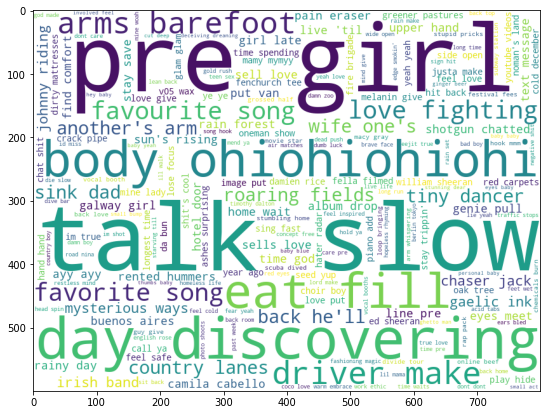

In [ ]:
def keyword_displayer():
  lyr = df['Lyric']
  #lyr = pd.concat([lyr[l] for l in range(len(lyr))],axis = 0).dropna()
  text = ''
  try:
    for k in lyr.index:
      text += lyr[k]
  except TypeError:
    pass

  extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
  res = extractor.apply(text)
  print(res[:10])
    
  wc = WordCloud(background_color='white',width=800,height=600)
  plt.figure(figsize=(15,7))
  plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))
keyword_displayer()

In [ ]:
listedwordsbigrams = make_bigrams(listedwords)
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
datalemmatizeded = lemmatization(listedwordsbigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(datalemmatizeded[:1])

[['club', 'good', 'place', 'find', 'bar', 'go', 'friend', 'table', 'shot', 'drink', 'fast', 'talk', 'slow', 'come', 'start', 'conversation', 'trust', 'give', 'chance', 'take', 'hand', 'stop', 'put', 'start', 'dance', 'singing', 'girl', 'know', 'want', 'love', 'love', 'handmade', 'come', 'follow', 'lead', 'crazy', 'mind', 'say', 'let', 'talk', 'much', 'grab', 'waist', 'put', 'body', 'come', 'follow', 'lead', 'come', 'come', 'follow', 'lead', 'love', 'shape', 'push', 'pull', 'magnet', 'heart', 'fall', 'love', 'body', 'last', 'night', 'room', 'bed', 'sheet', 'smell', 'day', 'discover', 'brand', 'new', 'love', 'body', 'love', 'body', 'love', 'body', 'love', 'body', 'day', 'discover', 'brand', 'new', 'love', 'shape', 'week', 'let', 'story', 'begin', 'go', 'first', 'date', 'thrifty', 'go', 'eat', 'fill', 'bag', 'fill', 'plate', 'talk', 'hour', 'hour', 'sweet', 'sour', 'family', 'leave', 'get', 'taxi', 'kiss', 'backseat', 'tell', 'driver', 'make', 'radio', 'play', 'singe', 'girl', 'know', 'wa

In [ ]:
id2worded = corpora.Dictionary(datalemmatizeded)
textsed = datalemmatizeded
corpused = [id2worded.doc2bow(text) for text in textsed]
print(corpused[:1])
[[(id2worded[id], freq) for id, freq in cp] for cp in corpused[:1]]
print(len(corpused))

[[(0, 14), (1, 1), (2, 1), (3, 1), (4, 3), (5, 1), (6, 17), (7, 6), (8, 1), (9, 1), (10, 37), (11, 1), (12, 2), (13, 1), (14, 1), (15, 6), (16, 6), (17, 1), (18, 1), (19, 1), (20, 3), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 6), (27, 1), (28, 1), (29, 2), (30, 1), (31, 3), (32, 1), (33, 2), (34, 1), (35, 2), (36, 3), (37, 2), (38, 1), (39, 2), (40, 3), (41, 6), (42, 1), (43, 3), (44, 25), (45, 3), (46, 1), (47, 2), (48, 2), (49, 6), (50, 3), (51, 1), (52, 1), (53, 1), (54, 3), (55, 3), (56, 3), (57, 1), (58, 3), (59, 2), (60, 6), (61, 3), (62, 1), (63, 1), (64, 1), (65, 1), (66, 3), (67, 1), (68, 2), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 4), (75, 1), (76, 1), (77, 1), (78, 1), (79, 2), (80, 2), (81, 1)]]
293


In [ ]:
lda_modeled = gensim.models.ldamodel.LdaModel(corpus=corpused,
                                           id2word=id2worded,
                                           num_topics=7, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=15,
                                           passes=13,
                                           alpha='auto',
                                           per_word_topics=True)

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [ ]:
pprint(lda_modeled.print_topics())
doc_ldaed = lda_modeled[corpused]

[(0,
  '0.028*"time" + 0.028*"get" + 0.022*"mind" + 0.022*"well" + 0.019*"thing" + '
  '0.019*"think" + 0.017*"go" + 0.017*"song" + 0.016*"give" + 0.016*"hook"'),
 (1,
  '0.143*"need" + 0.073*"man" + 0.035*"guide" + 0.025*"matter" + 0.014*"light" '
  '+ 0.014*"cause" + 0.011*"burn" + 0.009*"get" + 0.009*"seem" + 0.008*"make"'),
 (2,
  '0.031*"know" + 0.030*"never" + 0.023*"get" + 0.022*"drunk" + 0.021*"take" + '
  '0.021*"go" + 0.019*"make" + 0.016*"home" + 0.016*"way" + 0.015*"find"'),
 (3,
  '0.101*"come" + 0.079*"love" + 0.049*"baby" + 0.047*"body" + 0.020*"start" + '
  '0.020*"shape" + 0.018*"follow" + 0.016*"day" + 0.015*"dance" + 0.015*"new"'),
 (4,
  '0.072*"love" + 0.029*"know" + 0.024*"beautiful" + 0.023*"fall" + '
  '0.020*"baby" + 0.020*"look" + 0.019*"tell" + 0.017*"people" + 0.017*"happy" '
  '+ 0.017*"let"'),
 (5,
  '0.043*"get" + 0.020*"see" + 0.019*"burn" + 0.018*"lonely" + 0.017*"fire" + '
  '0.016*"high" + 0.016*"city" + 0.014*"low" + 0.013*"set" + 0.012*"side"'),
 (6

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_modeled.log_perplexity(corpused))  
# a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_ldaed = CoherenceModel(model=lda_modeled, texts=datalemmatizeded, dictionary=id2worded, coherence='c_v')
coherence_ldaed = coherence_model_ldaed.get_coherence()
print('\nCoherence Score: ', coherence_ldaed)

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for


Perplexity:  -6.563709108729124

Coherence Score:  0.38495093030537014


In [ ]:
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_modeled, corpused, id2worded)
vis

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.074004 -0.088274       1        1  35.377005
0     -0.131401 -0.117280       2        1  14.232673
4      0.211502  0.117927       3        1  13.760830
1     -0.131993  0.110511       4        1  12.012538
6     -0.019157 -0.218161       5        1   9.567305
3      0.214093  0.044003       6        1   8.786147
5     -0.217048  0.151273       7        1   6.263502, topic_info=      Term        Freq       Total Category  logprob  loglift
208   need  741.000000  741.000000  Default  30.0000  30.0000
44    love  946.000000  946.000000  Default  29.0000  29.0000
10    come  638.000000  638.000000  Default  28.0000  28.0000
109    man  417.000000  417.000000  Default  27.0000  27.0000
0     baby  298.000000  298.000000  Default  26.0000  26.0000
..     ...         ...         ...      ...      ...      ...
147   feel   23.961968  346.049064   Topic7  -4.6939   0.1003
50   night   19.471376  218.058888   Topic7  -4.9014   0.3546
539  water   17.280370   89.799287   Topic7  -5.0208   1.1224
302   call   16.549809   66.429554   Topic7  -5.0640   1.3807
184  watch   17.312894  125.004855   Topic7  -5.0189   0.7935

[402 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
864       4  0.932919     advice
790       2  0.939299  afterglow
384       4  0.957310        aim
82        5  0.992444      angel
2905      7  0.910910  apartment
...     ...       ...        ...
188       1  0.985016       work
189       1  0.950015       year
189       4  0.045674       year
738       2  0.804924        yet
738       3  0.187816        yet

[556 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 5, 2, 7, 4, 6])

# Maroon 5

In [ ]:
df = pd.read_csv("Maroon5.csv", encoding = "utf-8")
df.head()
#df['lyrics'] = df['lyrics'].apply(lambda x: str(x).lower())
fivelyrics = []
for lyrics in df['Lyric']:
  if (type(lyrics) == str):
    fivelyrics.append(lyrics)
fivelyrics = fivelyrics[:-1]
len(fivelyrics)

196

In [ ]:
newfivelyrics = []
for lyric in fivelyrics:
    #for line in lyric.split('\n'):
    for line in lyric.split(','):
        newfivelyrics.append(line)
fivelyrics = newfivelyrics

In [ ]:
processedfivelyrics = []
for lyric in fivelyrics:
    processedfivelyrics.append(preprocess(lyric))

processedfivelyrics[:10]

['adam levine spent 4 hours need hours spent weekend getting even ooh spent late nights making things right us good babe roll backwood babe play close adam levine cause girls like run round guys like til sundown come need girl like yeah yeah girls like love fun yeah want come need girl like yeah yeah post adam levine yeah yeah yeah yeah yeah yeah need girl like yeah yeah yeah yeah yeah yeah yeah yeah need girl like adam levine spent last night last flight ay took whole day tryna get way ooh spent daylight tryna make things right us good babe roll backwood babe play close yeah adam levine cause girls like run round guys like til sundown come need girl like yeah yeah girls like love fun yeah want come need girl like yeah yeah post adam levine yeah yeah yeah yeah yeah yeah need girl like yeah yeah yeah yeah yeah yeah yeah yeah need girl like yeah yeah need girl like yeah yeah need girl like adam levine maybe six fortyfive maybe barely alive maybe taken shit last time yeah maybe know drunk

In [ ]:
listfivewords=[]
for i in range(len(processedfivelyrics)):
    listfivewords.append(processedfivelyrics[i].split())
listfivewords[:5]

[['adam',
  'levine',
  'spent',
  '4',
  'hours',
  'need',
  'hours',
  'spent',
  'weekend',
  'getting',
  'even',
  'ooh',
  'spent',
  'late',
  'nights',
  'making',
  'things',
  'right',
  'us',
  'good',
  'babe',
  'roll',
  'backwood',
  'babe',
  'play',
  'close',
  'adam',
  'levine',
  'cause',
  'girls',
  'like',
  'run',
  'round',
  'guys',
  'like',
  'til',
  'sundown',
  'come',
  'need',
  'girl',
  'like',
  'yeah',
  'yeah',
  'girls',
  'like',
  'love',
  'fun',
  'yeah',
  'want',
  'come',
  'need',
  'girl',
  'like',
  'yeah',
  'yeah',
  'post',
  'adam',
  'levine',
  'yeah',
  'yeah',
  'yeah',
  'yeah',
  'yeah',
  'yeah',
  'need',
  'girl',
  'like',
  'yeah',
  'yeah',
  'yeah',
  'yeah',
  'yeah',
  'yeah',
  'yeah',
  'yeah',
  'need',
  'girl',
  'like',
  'adam',
  'levine',
  'spent',
  'last',
  'night',
  'last',
  'flight',
  'ay',
  'took',
  'whole',
  'day',
  'tryna',
  'get',
  'way',
  'ooh',
  'spent',
  'daylight',
  'tryna',
  'ma

In [ ]:
totalfive = 0
uniquesfive = set()
for sent in listfivewords:
    for w in sent:
        totalfive += 1
        uniquesfive.add(w)  

In [ ]:
model4 = Word2Vec(size=100,window=5,min_count=10, sg=0, alpha = 0.025)

In [ ]:
model4.build_vocab(listfivewords)


In [ ]:
model4.train(listfivewords, total_examples=model4.corpus_count, epochs=100)

(1948961, 3224200)

In [ ]:
model4.wv.most_similar("feel")

/usr/local/lib/python3.8/dist-packages/gensim/matutils.py:737: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if np.issubdtype(vec.dtype, np.int):


[('right', 0.38242030143737793),
 ('someplace', 0.3316833972930908),
 ('grown', 0.3103524446487427),
 ('make', 0.2910202741622925),
 ('back', 0.28575974702835083),
 ('mine', 0.28575849533081055),
 ('thing', 0.2812533974647522),
 ('yesterday', 0.2768039107322693),
 ('body', 0.2714453339576721),
 ('anymore', 0.2666160762310028)]

[('backwood babe', 4.0), ("'til sundown", 4.0), ('love fun', 4.0), ('adam levine', 4.0), ('yeah yeah', 4.0), ('time yeah', 4.0), ('long ago', 4.0), ('mama eeoow', 4.0), ('harley harley', 4.0), ("play wit'", 4.0)]


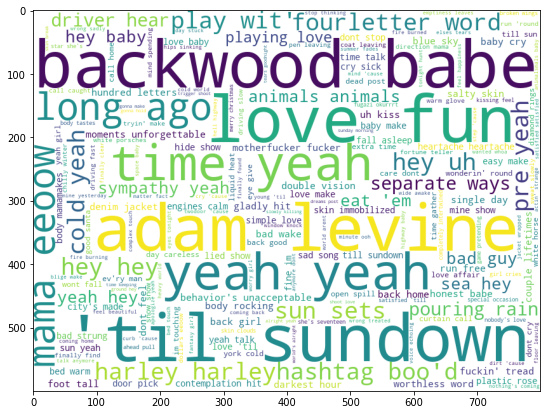

In [ ]:
keyword_displayer()

In [ ]:
listfivewordsbigrams = make_bigrams(listfivewords)
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
datalemmatizedfive = lemmatization(listfivewordsbigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(datalemmatizedfive[:1])

[['spend', 'hour', 'need', 'hour', 'spend', 'weekend', 'get', 'even', 'spend', 'late', 'night', 'make', 'thing', 'right', 'good', 'babe', 'roll', 'backwood', 'babe', 'play', 'close', 'girl', 'run', 'round', 'guy', 'til', 'sundown', 'come', 'need', 'girl', 'girl', 'love', 'fun', 'want', 'come', 'need', 'girl', 'post', 'need', 'girl', 'need', 'girl', 'spend', 'last', 'night', 'last', 'flight', 'ay', 'take', 'whole', 'day', 'tryna', 'get', 'way', 'spend', 'daylight', 'tryna', 'make', 'thing', 'right', 'good', 'babe', 'roll', 'backwood', 'babe', 'play', 'close', 'cause', 'girl', 'run', 'round', 'guy', 'til', 'sundown', 'come', 'need', 'girl', 'girl', 'love', 'fun', 'want', 'come', 'need', 'girl', 'post', 'need', 'girl', 'need', 'girl', 'need', 'girl', 'need', 'girl', 'maybe', 'fortyfive', 'maybe', 'barely', 'alive', 'maybe', 'take', 'shit', 'last', 'time', 'maybe', 'know', 'drunk', 'maybe', 'know', 'maybe', 'think', 'well', 'drive', 'long', 'ago', 'dancing', 'dollar', 'eeoow', 'know', 'rea

In [ ]:
id2wordfive = corpora.Dictionary(datalemmatizedfive)
textsfive = datalemmatizedfive
corpusfive = [id2wordfive.doc2bow(text) for text in textsfive]
print(corpusfive[:1])
[[(id2wordfive[id], freq) for id, freq in cp] for cp in corpusfive[:1]]
print(len(corpusfive))

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 4), (5, 2), (6, 1), (7, 1), (8, 1), (9, 2), (10, 3), (11, 2), (12, 9), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 3), (31, 3), (32, 23), (33, 1), (34, 3), (35, 3), (36, 1), (37, 1), (38, 2), (39, 1), (40, 3), (41, 3), (42, 1), (43, 2), (44, 1), (45, 1), (46, 1), (47, 3), (48, 2), (49, 6), (50, 2), (51, 17), (52, 1), (53, 2), (54, 1), (55, 5), (56, 1), (57, 3), (58, 1), (59, 2), (60, 2), (61, 1), (62, 3), (63, 2), (64, 3), (65, 3), (66, 1), (67, 1), (68, 5), (69, 1), (70, 2), (71, 3), (72, 1), (73, 2), (74, 2), (75, 1), (76, 1), (77, 1), (78, 3), (79, 2), (80, 2), (81, 5), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1)]]
196


In [ ]:
lda_modelfive = gensim.models.ldamodel.LdaModel(corpus=corpusfive,
                                           id2word=id2wordfive,
                                           num_topics=3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=5,
                                           passes=13,
                                           alpha='auto',
                                           per_word_topics=True)

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [ ]:
pprint(lda_modelfive.print_topics())
doc_ldafive = lda_modelfive[corpusfive]

[(0,
  '0.043*"know" + 0.036*"home" + 0.031*"way" + 0.028*"love" + 0.020*"take" + '
  '0.019*"ever" + 0.019*"use" + 0.019*"go" + 0.017*"say" + 0.017*"never"'),
 (1,
  '0.041*"memory" + 0.032*"bring" + 0.032*"get" + 0.024*"back" + 0.023*"find" '
  '+ 0.023*"go" + 0.023*"animal" + 0.021*"bad" + 0.013*"cause" + 0.012*"hurt"'),
 (2,
  '0.031*"need" + 0.028*"get" + 0.027*"say" + 0.024*"time" + 0.024*"want" + '
  '0.021*"feel" + 0.021*"come" + 0.021*"girl" + 0.019*"little" + 0.016*"love"')]


In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_modelfive.log_perplexity(corpusfive))  
# a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_ldafive = CoherenceModel(model=lda_modelfive, texts=datalemmatizedfive, dictionary=id2wordfive, coherence='c_v')
coherence_ldafive = coherence_model_ldafive.get_coherence()
print('\nCoherence Score: ', coherence_ldafive)

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for


Perplexity:  -6.130577652120372

Coherence Score:  0.28292876735168987


In [ ]:
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_modelfive, corpusfive, id2wordfive)
vis

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.134979  0.167815       1        1  45.376799
0     -0.106143 -0.181750       2        1  31.491637
1      0.241122  0.013935       3        1  23.131564, topic_info=       Term        Freq       Total Category  logprob  loglift
127  memory  229.000000  229.000000  Default  30.0000  30.0000
155    home  272.000000  272.000000  Default  29.0000  29.0000
51     need  340.000000  340.000000  Default  28.0000  28.0000
40     know  483.000000  483.000000  Default  27.0000  27.0000
115   bring  213.000000  213.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
75    think   52.261124  204.672880   Topic3  -4.6664   0.0988
90     baby   47.633987  157.380073   Topic3  -4.7591   0.2689
204    away   40.219693  119.861450   Topic3  -4.9283   0.3720
129   never   41.156617  259.612213   Topic3  -4.9053  -0.3778
48     make   41.231421  281.107696   Topic3  -4.9035  -0.4556

[189 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
1276      1  0.037569    air
1276      2  0.939219    air
1276      3  0.037569    air
1         1  0.165606  alive
1         3  0.828031  alive
...     ...       ...    ...
84        1  0.405830   well
84        2  0.590945   well
1127      3  0.980098  woman
391       3  0.949392   work
531       2  0.974963   wrap

[242 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])

# Kpop Topic Modeling

In [ ]:
kpopset = list_words + list_bts_words
kpopset[:10]
kpopset[::10]

[['call', 'one', 'shouting'],
 ['honk'],
 ['tada',
  'ba',
  'ra',
  'ba',
  'bam',
  'thunderous',
  'one',
  'appears',
  'wind',
  'bang'],
 ['attempt', 'look', 'cool', 'cute', 'even', 'come', 'close'],
 ['challenge', 'break', 'several', 'seals', 'ha', 'umm'],
 ['obvious', 'battle', 'bapsae', 'stork', 'annoying'],
 ['line', 'everyone', 'one', 'exception'],
 ['domino'],
 ['tap', 'everything', 'comes', 'falling', 'apart', 'yuh'],
 ['lightly', 'touch'],
 ['follow'],
 ['parmesan', 'cheese', 'say', 'one', 'word'],
 ['middle', 'finger'],
 ['du',
  'du',
  'du',
  'du',
  'du',
  'du',
  'funny',
  'cheese',
  'funny',
  'headache',
  'cheese',
  'grade',
  'vibes',
  'funny',
  'funny',
  'cheese',
  'pigeon',
  'magpie',
  'funny',
  'cheese',
  'crow',
  'crowing',
  'funny',
  'cheese',
  'grade',
  'vibes',
  'funny',
  'funny',
  'cheese'],
 ['calling', 'us', 'yet'],
 ['danger', 'called'],
 ['yeah'],
 ['ssick', 'came', 'see'],
 ['yeah', 'like', 'view', 'right', 'right'],
 ['know', 'e

In [ ]:
total = 0
uniques = set()
for sent in kpopset:
    for w in sent:
        total += 1
        uniques.add(w)     

In [ ]:
model5 = Word2Vec(size=100,window=5,min_count=10, sg=0, alpha = 0.025)

In [ ]:
model5.build_vocab(kpopset)

In [ ]:
model5.train(kpopset, total_examples=model5.corpus_count, epochs=100)

(4963582, 7149600)

In [ ]:
model5.wv.most_similar("youth")

/usr/local/lib/python3.8/dist-packages/gensim/matutils.py:737: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if np.issubdtype(vec.dtype, np.int):


[('young', 0.4577063024044037),
 ('zoom', 0.41225454211235046),
 ('hearts', 0.4077282249927521),
 ('write', 0.39794397354125977),
 ('forgot', 0.3776015639305115),
 ('hang', 0.36403128504753113),
 ('anywhere', 0.3461374342441559),
 ('says', 0.33587196469306946),
 ('domino', 0.31892988085746765),
 ('brighter', 0.31479185819625854)]

In [ ]:
kpopbigrams = make_bigrams(kpopset)
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
kpoplemmas = lemmatization(kpopbigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(kpoplemmas[:1])

[['call', 'shouting']]


In [ ]:
id2wordkpop = corpora.Dictionary(kpoplemmas)
textskpop = kpoplemmas
corpuskpop = [id2wordkpop.doc2bow(text) for text in textskpop]
print(corpuskpop[:1])
[[(id2wordkpop[id], freq) for id, freq in cp] for cp in corpuskpop[:1]]
print(len(corpuskpop))

[[(0, 1), (1, 1)]]
22275


In [ ]:
lda_modelkpop = gensim.models.ldamodel.LdaModel(corpus=corpuskpop,
                                           id2word=id2wordkpop,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=90,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

In [ ]:
pprint(lda_modelkpop.print_topics())
doc_ldakpop = lda_modelkpop[corpuskpop]

[(0,
  '0.115*"na" + 0.047*"run" + 0.036*"stay" + 0.023*"baby" + 0.020*"always" + '
  '0.019*"take" + 0.018*"need" + 0.016*"little" + 0.016*"try" + 0.016*"bring"'),
 (1,
  '0.060*"get" + 0.052*"go" + 0.049*"love" + 0.037*"let" + 0.024*"heart" + '
  '0.021*"world" + 0.020*"time" + 0.019*"cause" + 0.019*"hand" + 0.018*"life"'),
 (2,
  '0.045*"want" + 0.035*"right" + 0.034*"say" + 0.024*"keep" + 0.018*"away" + '
  '0.017*"call" + 0.017*"back" + 0.016*"tear" + 0.016*"die" + 0.015*"new"'),
 (3,
  '0.049*"know" + 0.031*"even" + 0.025*"come" + 0.025*"make" + 0.024*"day" + '
  '0.022*"feel" + 0.022*"dream" + 0.022*"look" + 0.018*"shit" + 0.017*"give"')]


In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_modelkpop.log_perplexity(corpuskpop))  
# a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_ldakpop = CoherenceModel(model=lda_modelkpop, texts=kpoplemmas, dictionary=id2wordkpop, coherence='c_v')
coherence_ldakpop = coherence_model_ldakpop.get_coherence()
print('\nCoherence Score: ', coherence_ldakpop)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt


Perplexity:  -7.431940936711347

Coherence Score:  0.5303172843088596


In [ ]:
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_modelkpop, corpuskpop, id2wordkpop)
vis

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.041226  0.285251       1        1  28.167718
1     -0.244412 -0.201813       2        1  27.282825
0      0.287067 -0.130625       3        1  23.548256
2     -0.001430  0.047187       4        1  21.001202, topic_info=           Term         Freq        Total Category  logprob  loglift
355          na  1535.000000  1535.000000  Default  30.0000  30.0000
26          get   922.000000   922.000000  Default  29.0000  29.0000
5            go   794.000000   794.000000  Default  28.0000  28.0000
45         know   784.000000   784.000000  Default  27.0000  27.0000
208        love   758.000000   758.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
254         yet   110.009182   112.234241   Topic4  -4.6778   1.5406
814   gentleman   105.463017   109.918651   Topic4  -4.7200   1.5192
1328        rap    75.766736    83.198362   Topic4  -5.0507   1.4670
3235     seesaw    97.820365   152.817543   Topic4  -4.7952   1.1145
2323    miracle    73.492673   105.527055   Topic4  -5.0812   1.1988

[162 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
540       3  0.992679  already
32        3  0.996630   always
991       3  0.990107   answer
87        4  0.993891     away
1047      1  0.019434      ayy
...     ...       ...      ...
254       1  0.008910      yet
254       2  0.008910      yet
254       3  0.008910      yet
254       4  0.980093      yet
465       1  0.994353    young

[164 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 1, 3])

# English Embeddings and Topic Modeling

In [ ]:
englishset = listedwords + listfivewords

In [ ]:
total = 0
uniques = set()
for sent in englishset:
    for w in sent:
        total += 1
        uniques.add(w)   

In [ ]:
model6 = Word2Vec(size=100,window=5,min_count=10, sg=0, alpha = 0.025)

In [ ]:
model6.build_vocab(englishset)

In [ ]:
model6.train(englishset, total_examples=model6.corpus_count, epochs=100)

(5922155, 8579600)

In [ ]:
model6.wv.most_similar("alone")

/usr/local/lib/python3.8/dist-packages/gensim/matutils.py:737: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if np.issubdtype(vec.dtype, np.int):


[('tonight', 0.3512271046638489),
 ('take', 0.3473677635192871),
 ('leave', 0.31957751512527466),
 ('know', 0.3031807839870453),
 ('nina', 0.2804185748100281),
 ('oh', 0.2718285024166107),
 ('scars', 0.2687952220439911),
 ('coming', 0.265447735786438),
 ('hear', 0.2581457495689392),
 ('peace', 0.2538490891456604)]

In [ ]:
englishbigrams = make_bigrams(englishset)
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
englishlemmas = lemmatization(englishbigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(englishlemmas[:1])

[['club', 'good', 'place', 'find', 'bar', 'go', 'friend', 'table', 'shot', 'drink', 'fast', 'talk', 'slow', 'come', 'start', 'conversation', 'trust', 'give', 'chance', 'take', 'hand', 'stop', 'put', 'start', 'dance', 'singing', 'girl', 'know', 'want', 'love', 'love', 'handmade', 'come', 'follow', 'lead', 'crazy', 'mind', 'say', 'let', 'talk', 'much', 'grab', 'waist', 'put', 'body', 'come', 'follow', 'lead', 'come', 'come', 'follow', 'lead', 'love', 'shape', 'push', 'pull', 'magnet', 'heart', 'fall', 'love', 'body', 'last', 'night', 'room', 'bed', 'sheet', 'smell', 'day', 'discover', 'brand', 'new', 'love', 'body', 'love', 'body', 'love', 'body', 'love', 'body', 'day', 'discover', 'brand', 'new', 'love', 'shape', 'week', 'let', 'story', 'begin', 'go', 'first', 'date', 'thrifty', 'go', 'eat', 'fill', 'bag', 'fill', 'plate', 'talk', 'hour', 'hour', 'sweet', 'sour', 'family', 'leave', 'get', 'taxi', 'kiss', 'backseat', 'tell', 'driver', 'make', 'radio', 'play', 'singe', 'girl', 'know', 'wa

In [ ]:
id2wordenglish = corpora.Dictionary(englishlemmas)
textsenglish = englishlemmas
corpusenglish = [id2wordenglish.doc2bow(text) for text in textsenglish]
print(corpusenglish[:1])
[[(id2wordenglish[id], freq) for id, freq in cp] for cp in corpusenglish[:1]]
print(len(corpusenglish))

[[(0, 14), (1, 1), (2, 1), (3, 1), (4, 3), (5, 1), (6, 17), (7, 6), (8, 1), (9, 1), (10, 37), (11, 1), (12, 2), (13, 1), (14, 1), (15, 6), (16, 6), (17, 1), (18, 1), (19, 1), (20, 3), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 6), (27, 1), (28, 1), (29, 2), (30, 1), (31, 3), (32, 1), (33, 2), (34, 1), (35, 2), (36, 3), (37, 2), (38, 1), (39, 2), (40, 3), (41, 6), (42, 1), (43, 3), (44, 25), (45, 3), (46, 1), (47, 2), (48, 2), (49, 6), (50, 3), (51, 1), (52, 1), (53, 1), (54, 3), (55, 3), (56, 3), (57, 1), (58, 3), (59, 2), (60, 6), (61, 3), (62, 1), (63, 1), (64, 1), (65, 1), (66, 3), (67, 1), (68, 2), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 4), (75, 1), (76, 1), (77, 1), (78, 1), (79, 2), (80, 2), (81, 1)]]
489


In [ ]:
lda_modelenglish = gensim.models.ldamodel.LdaModel(corpus=corpusenglish,
                                           id2word=id2wordenglish,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [ ]:
pprint(lda_modelenglish.print_topics())
doc_ldakenglish = lda_modelenglish[corpusenglish]

[(0,
  '0.040*"know" + 0.030*"home" + 0.025*"go" + 0.021*"get" + 0.019*"take" + '
  '0.018*"see" + 0.018*"make" + 0.017*"never" + 0.014*"away" + 0.013*"way"'),
 (1,
  '0.053*"get" + 0.022*"come" + 0.018*"go" + 0.015*"want" + 0.015*"back" + '
  '0.013*"know" + 0.012*"take" + 0.010*"put" + 0.010*"move" + 0.010*"border"'),
 (2,
  '0.058*"love" + 0.029*"say" + 0.022*"feel" + 0.021*"never" + 0.019*"time" + '
  '0.018*"get" + 0.017*"heart" + 0.017*"memory" + 0.017*"little" + '
  '0.016*"give"'),
 (3,
  '0.062*"need" + 0.036*"come" + 0.031*"girl" + 0.022*"love" + 0.018*"want" + '
  '0.017*"baby" + 0.017*"man" + 0.014*"get" + 0.013*"night" + 0.011*"cause"'),
 (4,
  '0.026*"go" + 0.018*"bad" + 0.014*"want" + 0.013*"fly" + 0.013*"hurt" + '
  '0.013*"cause" + 0.012*"walk" + 0.011*"happy" + 0.010*"see" + 0.010*"door"')]


In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_modelenglish.log_perplexity(corpusenglish))  
# a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_ldaenglish = CoherenceModel(model=lda_modelenglish, texts=englishlemmas, dictionary=id2wordenglish, coherence='c_v')
coherence_ldaenglish = coherence_model_ldaenglish.get_coherence()
print('\nCoherence Score: ', coherence_ldaenglish)

/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for


Perplexity:  -6.430406582997953

Coherence Score:  0.2956895311112798


In [ ]:
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_modelenglish, corpusenglish, id2wordenglish)
vis

/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.002947 -0.103670       1        1  26.593656
3     -0.096157  0.142465       2        1  26.253440
2     -0.052694 -0.173206       3        1  21.966871
1     -0.078611  0.086412       4        1  14.867103
4      0.230409  0.047999       5        1  10.318930, topic_info=     Term         Freq        Total Category  logprob  loglift
208  need  1119.000000  1119.000000  Default  30.0000  30.0000
44   love  1367.000000  1367.000000  Default  29.0000  29.0000
104  home   562.000000   562.000000  Default  28.0000  28.0000
28    get  1403.000000  1403.000000  Default  27.0000  27.0000
29   girl   604.000000   604.000000  Default  26.0000  26.0000
..    ...          ...          ...      ...      ...      ...
39   know    63.743730  1284.535566   Topic5  -4.6687  -0.7321
185   way    52.322587   559.526223   Topic5  -4.8661  -0.0985
10   come    50.152015  1057.243401   Topic5  -4.9085  -0.7772
59    say    47.753418   796.452404   Topic5  -4.9575  -0.5429
76   tell    41.148046   276.744305   Topic5  -5.1064   0.3653

[358 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
1479      1  0.972672  almost
82        2  0.038399   angel
82        4  0.268792   angel
82        5  0.691179   angel
226       2  0.996827  animal
...     ...       ...     ...
188       1  0.843283    work
188       2  0.021623    work
188       3  0.129736    work
1430      1  0.972069   worth
3782      4  0.945201     yea

[628 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 3, 2, 5])

In [ ]:
model6.wv.most_similar("feel")

/usr/local/lib/python3.8/dist-packages/gensim/matutils.py:737: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if np.issubdtype(vec.dtype, np.int):


[('make', 0.35251545906066895),
 ('touch', 0.3514775037765503),
 ('cause', 0.35035866498947144),
 ('right', 0.31859290599823),
 ('anymore', 0.2934219241142273),
 ('im', 0.2933309078216553),
 ('love', 0.2857818603515625),
 ('sympathy', 0.2838325500488281),
 ('times', 0.27951252460479736),
 ('need', 0.27831923961639404)]

In [ ]:
model6.wv.most_similar("heart")

/usr/local/lib/python3.8/dist-packages/gensim/matutils.py:737: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if np.issubdtype(vec.dtype, np.int):


[('love', 0.29909780621528625),
 ('soul', 0.29555001854896545),
 ('december', 0.2901023328304291),
 ('hearts', 0.2786620259284973),
 ('fall', 0.2774215638637543),
 ('apart', 0.2742241322994232),
 ('today', 0.26346004009246826),
 ('take', 0.2600329518318176),
 ('see', 0.2581002116203308),
 ('find', 0.25665661692619324)]

In [ ]:
model6.wv.most_similar("hurt")

/usr/local/lib/python3.8/dist-packages/gensim/matutils.py:737: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if np.issubdtype(vec.dtype, np.int):


[('fucker', 0.4508323073387146),
 ('uhhuh', 0.4316607713699341),
 ('beyond', 0.4078202247619629),
 ('motherfucker', 0.38483506441116333),
 ('star', 0.371164470911026),
 ('woohoo', 0.36178332567214966),
 ('hush', 0.31777673959732056),
 ('cries', 0.3145677149295807),
 ('deserve', 0.3011934757232666),
 ('torn', 0.28336262702941895)]

In [ ]:
model6.wv.most_similar("alone")

/usr/local/lib/python3.8/dist-packages/gensim/matutils.py:737: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if np.issubdtype(vec.dtype, np.int):


[('tonight', 0.3512271046638489),
 ('take', 0.3473677635192871),
 ('leave', 0.31957751512527466),
 ('know', 0.3031807839870453),
 ('nina', 0.2804185748100281),
 ('oh', 0.2718285024166107),
 ('scars', 0.2687952220439911),
 ('coming', 0.265447735786438),
 ('hear', 0.2581457495689392),
 ('peace', 0.2538490891456604)]

In [ ]:
model5.wv.most_similar("feel")

/usr/local/lib/python3.8/dist-packages/gensim/matutils.py:737: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if np.issubdtype(vec.dtype, np.int):


[('turn', 0.2677983343601227),
 ('work', 0.26548582315444946),
 ('passing', 0.26278164982795715),
 ('front', 0.26272302865982056),
 ('things', 0.2607487440109253),
 ('looks', 0.25002673268318176),
 ('comfortable', 0.24928975105285645),
 ('sadness', 0.248114213347435),
 ('sad', 0.24751678109169006),
 ('hurt', 0.2380433827638626)]

In [ ]:
model5.wv.most_similar("heart")

/usr/local/lib/python3.8/dist-packages/gensim/matutils.py:737: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if np.issubdtype(vec.dtype, np.int):


[('remedy', 0.30437615513801575),
 ('time', 0.2996007800102234),
 ('whenever', 0.2690536081790924),
 ('look', 0.2610655426979065),
 ('cry', 0.2547718286514282),
 ('back', 0.254036545753479),
 ('left', 0.25392618775367737),
 ('faster', 0.252575159072876),
 ('fall', 0.2469024360179901),
 ('little', 0.2443564534187317)]

In [ ]:
model5.wv.most_similar("hurt")

/usr/local/lib/python3.8/dist-packages/gensim/matutils.py:737: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if np.issubdtype(vec.dtype, np.int):


[('needing', 0.5101094245910645),
 ('kinda', 0.4514268636703491),
 ('hard', 0.4029961824417114),
 ('drunk', 0.38233476877212524),
 ('support', 0.35212695598602295),
 ('sometimes', 0.3467053771018982),
 ('seem', 0.32871678471565247),
 ('hero', 0.3284752368927002),
 ('fall', 0.3046700358390808),
 ('know', 0.3017732799053192)]

In [ ]:
model5.wv.most_similar("alone")

/usr/local/lib/python3.8/dist-packages/gensim/matutils.py:737: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if np.issubdtype(vec.dtype, np.int):


[('door', 0.33913862705230713),
 ('walking', 0.3361366391181946),
 ('ever', 0.3051547408103943),
 ('sadness', 0.30103617906570435),
 ('anymore', 0.2912180721759796),
 ('dreamed', 0.2909335196018219),
 ('window', 0.28927886486053467),
 ('ago', 0.2888144552707672),
 ('exists', 0.2808699607849121),
 ('road', 0.27757057547569275)]

In [ ]:
model1.wv.most_similar("alone")

/usr/local/lib/python3.8/dist-packages/gensim/matutils.py:737: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if np.issubdtype(vec.dtype, np.int):


[('walking', 0.993998646736145),
 ('follow', 0.986382246017456),
 ('inside', 0.9789272546768188),
 ('always', 0.9782162308692932),
 ('moment', 0.9770317077636719),
 ('stop', 0.9762023091316223),
 ('us', 0.975684642791748),
 ('head', 0.9753426313400269),
 ('feel', 0.9735504984855652),
 ('back', 0.9730136394500732)]

In [ ]:
model2.wv.most_similar("alone")

/usr/local/lib/python3.8/dist-packages/gensim/matutils.py:737: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if np.issubdtype(vec.dtype, np.int):


[('loved', 0.38166093826293945),
 ('ayy', 0.3147789239883423),
 ('crime', 0.31286874413490295),
 ('ago', 0.31281301379203796),
 ('hurting', 0.3056369721889496),
 ('seen', 0.3054284155368805),
 ('wish', 0.28807464241981506),
 ('met', 0.2838103175163269),
 ('mma', 0.28353604674339294),
 ('dreamed', 0.2824786305427551)]

In [ ]:
model1.wv.most_similar("heart")

/usr/local/lib/python3.8/dist-packages/gensim/matutils.py:737: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if np.issubdtype(vec.dtype, np.int):


[('getting', 0.9803234338760376),
 ('leave', 0.9754800200462341),
 ('keep', 0.9668456315994263),
 ('smile', 0.9659160375595093),
 ('domino', 0.9597247838973999),
 ('us', 0.9538736343383789),
 ('crazy', 0.9475643634796143),
 ('hop', 0.9373534321784973),
 ('closer', 0.9346956014633179),
 ('words', 0.934639036655426)]

In [ ]:
model2.wv.most_similar("heart")

/usr/local/lib/python3.8/dist-packages/gensim/matutils.py:737: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if np.issubdtype(vec.dtype, np.int):


[('remedy', 0.35424500703811646),
 ('gets', 0.31999605894088745),
 ('cry', 0.307437539100647),
 ('faster', 0.29343128204345703),
 ('beats', 0.28286880254745483),
 ('instead', 0.27967214584350586),
 ('breathe', 0.2784969210624695),
 ('dad', 0.27049076557159424),
 ('deeper', 0.2582330107688904),
 ('singing', 0.25821834802627563)]